# Question 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
class MARL:
    def __init__(self, states, actions, rewards, gamma=0.99):
        self.gamma = gamma
        self.states = states
        self.actions = actions
        self.rewards = rewards

        self.transition = dict()
        for action in actions:
            self.transition[action] = np.zeros((len(states), len(states)))

        self.optimal_value = np.zeros((len(states)))
        self.policy = [actions[0] for _ in states]  # Initialize a random policy

        
    def update_transition(self, action, state, next_state, probability):
        self.transition[action][self.states.index(state), self.states.index(next_state)] = probability

    def value_iteration(self):
        while True:
            temp_value = self.optimal_value.copy()
            for i, state in enumerate(self.states):
                temp = list()
                for action in self.actions:
                    temp.append(np.dot(self.transition[action][i], self.optimal_value.T))

                self.optimal_value[i] = self.rewards[i] + self.gamma * np.max(temp)

            if np.array_equal(temp_value, self.optimal_value):
                print("Optimal Value:")
                res = "\n".join("{} {}".format(x, y) for x, y in zip(self.states, self.optimal_value))
                print(res)

                print("Optimal Policy")
                optimal_policy = list()
                for i, state in enumerate(self.states):
                    temp = list()
                    for action in self.actions:
                        temp.append(np.dot(self.transition[action][i], self.optimal_value.T))
                    optimal_policy.append(self.actions[np.argmax(temp)])
                res = "\n".join("{} {}".format(x, y) for x, y in zip(self.states, optimal_policy))
                print(res)

                break

    def policy_evaluation(self):
        """
        Perform policy evaluation: Update the value function for a given policy.
        """
        while True:
            temp_value = self.optimal_value.copy()
            for i, state in enumerate(self.states):
                action = self.policy[i]
                self.optimal_value[i] = self.rewards[i] + self.gamma * np.dot(self.transition[action][i], self.optimal_value.T)

            if np.array_equal(temp_value, self.optimal_value):
                break

    def policy_improvement(self):
        """
        Perform policy improvement: Update the policy based on the current value function.
        """
        policy_stable = True
        for i, state in enumerate(self.states):
            old_action = self.policy[i]
            action_values = []

            for action in self.actions:
                action_value = np.dot(self.transition[action][i], self.optimal_value.T)
                action_values.append(action_value)

            best_action = self.actions[np.argmax(action_values)]
            self.policy[i] = best_action

            if old_action != best_action:
                policy_stable = False

        return policy_stable

    def policy_iteration(self):
        """
        Perform policy iteration: Iteratively evaluate and improve the policy until it is stable.
        """
        while True:
            self.policy_evaluation()
            if self.policy_improvement():
                print("Optimal Value:")
                res = "\n".join("{} {}".format(x, y) for x, y in zip(self.states, self.optimal_value))
                print(res)
                print("Optimal Policy Found:")
                res = "\n".join("{} {}".format(x, y) for x, y in zip(self.states, self.policy))
                print(res)
                break



    
        



## State Transition Probability

In [3]:
xx = MARL(states=["Hostel", "Academic Building", "Canteen"], actions=["Eat", "Class"], rewards=[-1, 3, 1])
xx.update_transition('Eat', 'Hostel', 'Canteen', 1.0)
xx.update_transition('Eat', 'Academic Building', 'Academic Building', 0.2)
xx.update_transition('Eat', 'Academic Building', 'Canteen', 0.8)
xx.update_transition('Eat', 'Canteen', 'Canteen', 1.0)

xx.update_transition('Class', 'Hostel', 'Hostel', 0.5)
xx.update_transition('Class', 'Hostel', 'Academic Building', 0.5)
xx.update_transition('Class', 'Academic Building', 'Academic Building', 0.7)
xx.update_transition('Class', 'Academic Building', 'Canteen', 0.3)
xx.update_transition('Class', 'Canteen', 'Canteen', 0.1)
xx.update_transition('Class', 'Canteen', 'Academic Building', 0.6)
xx.update_transition('Class', 'Canteen', 'Hostel', 0.3)

## Value Iteration

In [4]:
xx.value_iteration()

Optimal Value:
Hostel 199.77106141237684
Academic Building 205.82704245101073
Canteen 202.65623579952972
Optimal Policy
Hostel Class
Academic Building Class
Canteen Class


## Policy Iteration

In [5]:
xx.policy_iteration()

Optimal Value:
Hostel 199.77106141237684
Academic Building 205.82704245101073
Canteen 202.65623579952972
Optimal Policy Found:
Hostel Class
Academic Building Class
Canteen Class


# Question 2

In [6]:
class MARL:
    def __init__(self, states, actions, rewards, gamma=0.99):
        self.gamma = gamma
        self.states = states
        self.actions = actions
        self.rewards = rewards

        self.transition = dict()
        for action in actions:
            self.transition[action] = np.zeros((len(states), len(states)))

        self.optimal_value = np.zeros((len(states)))
        self.policy = [actions[0] for _ in states]  # Initialize a random policy

        
    def update_transition(self, action, state, next_state, probability):
        self.transition[action][self.states.index(state), self.states.index(next_state)] = probability

    def get_transition(self, action, state, next_state):
        return self.transition[action][self.states.index(state), self.states.index(next_state)]
    
    def find_transition(self, state):
        for action in self.actions:
            index = np.where(self.transition[action][self.states.index(state), :] == 1)[0]
            if len(index) > 0:
                print(action, self.states[index[0]])

    def value_iteration(self):
        while True:
            temp_value = self.optimal_value.copy()
            for i, state in enumerate(self.states):
                temp = list()
                for action in self.actions:
                    temp.append(np.dot(self.transition[action][self.states.index(state)], self.optimal_value.T))

                self.optimal_value[self.states.index(state)] = self.rewards[self.states.index(state)] + self.gamma * np.max(temp)
            if np.array_equal(temp_value, self.optimal_value):
                # print("Optimal Value:")
                # res = "\n".join("{} {}".format(x, y) for x, y in zip(self.states, self.optimal_value))
                # print(res)

                # print("Optimal Policy")
                optimal_policy = dict()
                for i in range(len(self.states)):
                    optimal_policy[i] = []
                for i, state in enumerate(self.states):
                    temp = list()
                    for action in self.actions:
                        temp.append(np.dot(self.transition[action][i], self.optimal_value.T))
                    for actions in np.argwhere(temp == np.max(temp)).flatten().tolist():
                        optimal_policy[i].append(self.actions[actions])
                # res = "\n".join("{} {}".format(x, y) for x, y in zip(self.states, optimal_policy))
                # print(res)

                return optimal_policy

    def policy_evaluation(self):
        """
        Perform policy evaluation: Update the value function for a given policy.
        """
        while True:
            temp_value = self.optimal_value.copy()
            for i, state in enumerate(self.states):
                action = self.policy[i]
                self.optimal_value[i] = self.rewards[i] + self.gamma * np.dot(self.transition[action][i], self.optimal_value.T)
            if np.allclose(temp_value, self.optimal_value):
                break

    def policy_improvement(self):
        """
        Perform policy improvement: Update the policy based on the current value function.
        """
        optimal_policy = dict()
        for i in range(len(self.states)):
            optimal_policy[i] = []
        policy_stable = True
        for i, state in enumerate(self.states):
            old_action = self.policy[i]
            action_values = []

            for action in self.actions:
                action_value = np.dot(self.transition[action][i], self.optimal_value.T)
                action_values.append(action_value)
            for actions in np.argwhere(action_values == np.max(action_values)).flatten().tolist():

                optimal_policy[i].append(self.actions[actions])
            best_action = self.actions[np.argmax(action_values)]
            # self.policy = optimal_policy
            self.policy[i] = best_action

            if old_action != best_action:
                policy_stable = False
        return policy_stable, optimal_policy

    def policy_iteration(self):
        """
        Perform policy iteration: Iteratively evaluate and improve the policy until it is stable.
        """
        while True:
            self.policy_evaluation()
            policy_stable, optimal_policy = self.policy_improvement()
            
            if policy_stable:
                # print("Optimal Value:")
                # res = "\n".join("{} {}".format(x, y) for x, y in zip(self.states, self.optimal_value))
                # print(res)
                # print("Optimal Policy Found:")
                # res = "\n".join("{} {}".format(x, y) for x, y in zip(self.states, self.policy))
                # print(res)
                return optimal_policy
       

## Setup the Environment

In [7]:
a = np.empty((9, 9), dtype=str)
a.fill("E")
a[0, 0] = 'S'
a[1:4, 3] = "N"
a[3, 1:4] = "N"
a[5:, 5] = "N"
a[5, 5:] = "N"
a[-1, -1] = "G"
a[2, 2] = "I"
a[6, 6] = "O"
a

array([['S', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E'],
       ['E', 'E', 'E', 'N', 'E', 'E', 'E', 'E', 'E'],
       ['E', 'E', 'I', 'N', 'E', 'E', 'E', 'E', 'E'],
       ['E', 'N', 'N', 'N', 'E', 'E', 'E', 'E', 'E'],
       ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E'],
       ['E', 'E', 'E', 'E', 'E', 'N', 'N', 'N', 'N'],
       ['E', 'E', 'E', 'E', 'E', 'N', 'O', 'E', 'E'],
       ['E', 'E', 'E', 'E', 'E', 'N', 'E', 'E', 'E'],
       ['E', 'E', 'E', 'E', 'E', 'N', 'E', 'E', 'G']], dtype='<U1')

## State Transition Probability

In [8]:
states = []
for i in range(9):
    for j in range(9):
        states.append((i, j))

rewards = list()
for i in range(len(states)):
    rewards.append(0)
rewards[-1] = 1

def update_transition(xx):
    for i in range(8):
        for j in range(9):
            if a[i, j] != "N" and a[i+1, j] != "N":
                xx.update_transition('up', (i, j), (i+1, j), 1)

    for i in range(8, 0, -1):
        for j in range(9):
            if a[i, j] != "N" and a[i-1, j] != "N":
                xx.update_transition('down', (i, j), (i-1, j), 1)

    for i in range(9):
        for j in range(0, 8):
            if a[i, j] != "N" and a[i, j+1] != "N":
                xx.update_transition('right', (i, j), (i, j+1), 1)

    for i in range(9):
        for j in range(8, 0, -1):
            if a[i, j] != "N" and a[i, j-1] != "N":
                xx.update_transition('left', (i, j), (i, j-1), 1)

    xx.update_transition('down', (2, 2), (6, 6), 1)
    xx.update_transition('down', (2, 2), (1, 2), 0)
    xx.update_transition('left', (2, 2), (2, 1), 0)
    xx.update_transition('left', (2, 2), (6, 6), 1)
    xx.update_transition('down', (8, 8), (7, 8), 0)
    xx.update_transition('left', (8, 8), (8, 7), 0)



## Quiver Plot Function

In [9]:
def plot(optimal_policy, rl_env):
    # Grid size
    grid_size = (9, 9)

    # Initialize grid (0: empty, 1: obstacle, 2: tunnel, 3: start, 4: end)
    grid = np.zeros(grid_size, dtype=int)

    # Define some obstacles
    obstacles = [(3, 1), (3, 2), (3, 3), (2, 3), (1, 3), 
                (8, 5), (7, 5), (6, 5), (5, 5), (5, 6), (5, 7), (5, 8)]
    for (x, y) in obstacles:
        grid[x, y] = 1

    tunnel_in = (2, 2)
    tunnel_out = (6, 6)

    # Define start and end cells
    start = (0, 0)
    end = (8, 8)
    grid[start] = 3
    grid[end] = 4

    # Set up the figure
    fig, ax = plt.subplots(figsize=(8, 8))

    # Create quiver plot data
    X, Y = np.meshgrid(np.arange(grid_size[1]), np.arange(grid_size[0]))
    U = np.zeros_like(X, dtype=float)
    V = np.zeros_like(Y, dtype=float)

    # Direction vectors for 'up', 'down', 'left', 'right'
    directions = {
        'up': (0, 1),
        'down': (0, -1),
        'left': (-1, 0),
        'right': (1, 0)
    }
    for i in range(9):
        for j in range(9):
            policies = optimal_policy[rl_env.states.index((i, j))]
            for policy in policies:
                ax.quiver(j, i, directions[policy][0], directions[policy][1])

    for (x, y) in obstacles:
        ax.add_patch(plt.Rectangle((y - 0.5, x - 0.5), 1, 1, color='black'))

    ax.plot(start[1], start[0], 'go', markersize=10, label='Start')
    ax.plot(end[1], end[0], 'ro', markersize=10, label='End')
    ax.plot(tunnel_in[1], tunnel_in[0], color='orange', marker='o', markersize=10, label='IN')
    ax.plot(tunnel_out[1], tunnel_out[0], color='blue', marker='o', markersize=10, label='OUT')

    # Plot quiver (arrows)
    # ax.quiver(X, Y, U, V)

    # Set grid and labels
    ax.set_xticks(np.arange(-0.5, grid_size[1], 1))
    ax.set_yticks(np.arange(-0.5, grid_size[0], 1))
    ax.grid(color='gray', linestyle='-', linewidth=0.5)
    ax.set_xlim([-0.5, grid_size[1] - 0.5])
    ax.set_ylim([-0.5, grid_size[0] - 0.5])
    ax.set_aspect('equal')
    ax.legend()
    # ax.set_axis_off()
    ax.grid(True)

    plt.show()

## Value Iteration

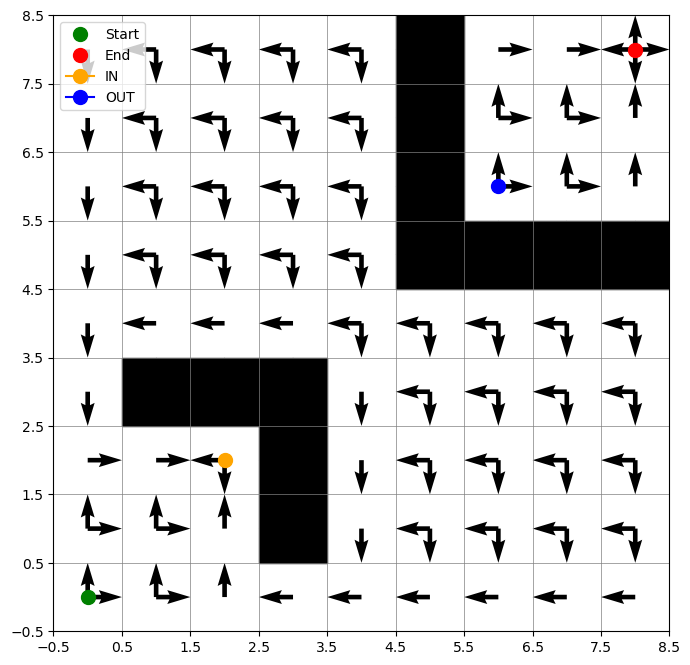

In [10]:
env = MARL(states=states, actions=["up", "down", "right", "left"], rewards=rewards)
update_transition(env)
optimal_policy = env.value_iteration()
plot(optimal_policy, env)

## Policy Iteration

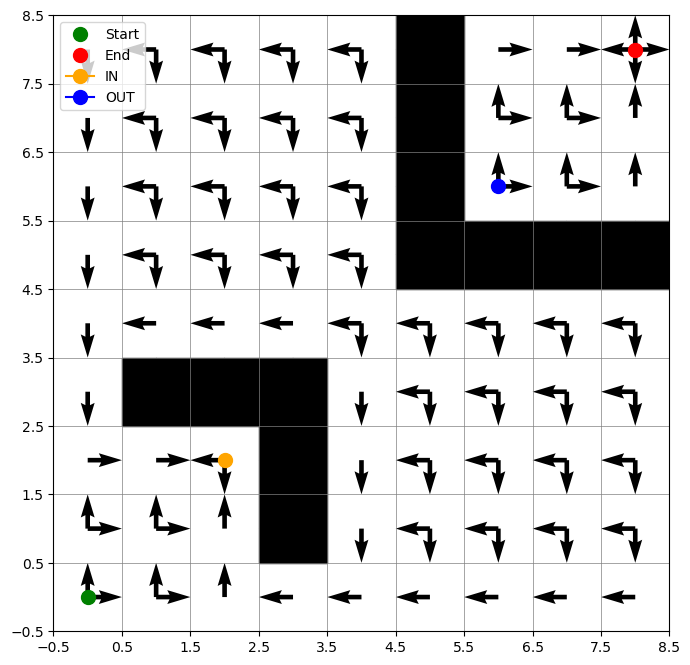

In [11]:
env = MARL(states=states, actions=["up", "down", "right", "left"], rewards=rewards)
update_transition(env)
optimal_policy = env.policy_iteration()
plot(optimal_policy, env)

ValueError: (0, 0) is not in list

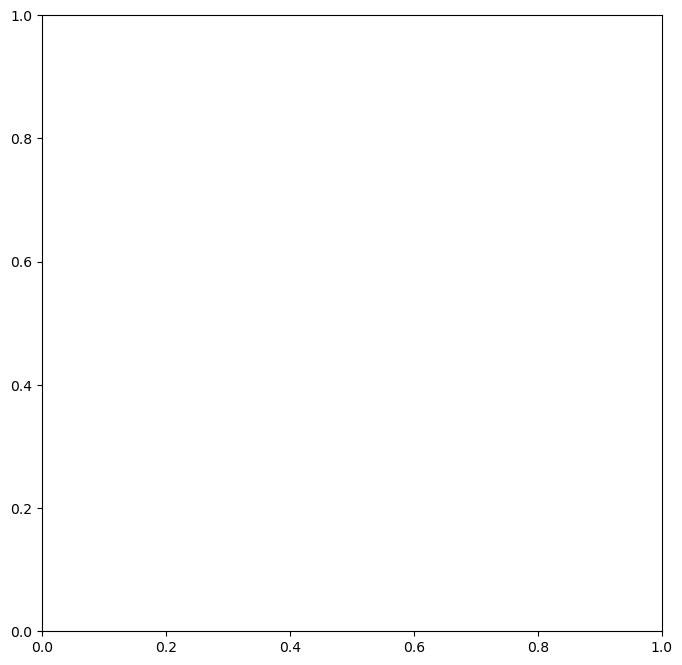

In [12]:
plot(optimal_policy, xx)